# 🚢 Titanic Dataset –  Using The Logistic Regression  
### *Notebook prepared by Muhammad Anas*

---

## 📘 Dataset Description  
The Titanic dataset from Seaborn contains information about passengers aboard the RMS Titanic.  
It is commonly used for practicing **data cleaning**, **exploratory analysis**, and **classification models**.

---

## 📑 Column Descriptions

| Column | Meaning |
|--------|---------|
| **survived** | Survival status (0 = No, 1 = Yes). |
| **pclass** | Passenger class (1st, 2nd, 3rd). |
| **sex** | Gender of the passenger. |
| **age** | Age in years. |
| **sibsp** | Number of siblings/spouses aboard. |
| **parch** | Number of parents/children aboard. |
| **fare** | Ticket fare paid. |
| **embarked** | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). |
| **class** | Passenger class as a category. |
| **adult_male** | Whether the passenger is an adult male. |
| **deck** | The deck the passenger was on (if known). |
| **embark_town** | Town where the passenger boarded. |
| **alive** | Survival status as Yes/No. |
| **alone** | Whether the passenger was alone. |

---



In [176]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

In [177]:
#load the data 
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [178]:
#cheking the shape of the dataset 
df.shape

(891, 15)

In [179]:
#cheking the info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [180]:
#cheking for the nulls values 
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [181]:
#cheking for the duplicates values 
df.duplicated().sum()

np.int64(107)

In [182]:
#imputing the nulls in data
df['deck'].fillna(df['deck'].mode()[0], inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
x=df.drop(['survived'],axis=1)
y=df['survived']
x.head()


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [183]:
#cheking for the nulls after imputing nulls 
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [184]:
#checking for the duplicates after imputing nulls 
df.duplicated().sum()

np.int64(108)

In [185]:
#checking the duplicated rows 
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,C,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,C,Southampton,no,True


In [186]:
#removing the duplicated 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [187]:
#encoding of the categorical data using the label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['class']=le.fit_transform(df['class'])
df['who']=le.fit_transform(df['who'])
df['deck']=le.fit_transform(df['deck'])
df['embarked']=le.fit_transform(df['embarked'])
df['embark_town']=le.fit_transform(df['embark_town'])
df['alive']=le.fit_transform(df['alive'])
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,2,0,True


In [188]:
#checking the relation ship of the features 
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.334817,-0.515373,-0.078331,-0.037180,0.069818,0.246716,-0.154337,-0.334817,0.304732,-0.528068,0.088702,-0.154337,1.000000,-0.175829
pclass,-0.334817,1.000000,0.116974,-0.337997,0.087161,0.039432,-0.550261,0.175944,1.000000,-0.205227,0.068538,0.030633,0.175944,-0.334817,0.111368
sex,-0.515373,0.116974,1.000000,0.092599,-0.097899,-0.236577,-0.169381,0.098314,0.116974,-0.625111,0.898918,-0.079372,0.098314,-0.515373,0.279843
age,-0.078331,-0.337997,0.092599,1.000000,-0.280119,-0.187165,0.090261,-0.031989,-0.337997,0.361003,0.274537,-0.047295,-0.031989,-0.078331,0.194029
sibsp,-0.037180,0.087161,-0.097899,-0.280119,1.000000,0.381225,0.135067,0.063244,0.087161,-0.196774,-0.274117,0.003806,0.063244,-0.037180,-0.609317
parch,0.069818,0.039432,-0.236577,-0.187165,0.381225,1.000000,0.191876,0.043007,0.039432,-0.067863,-0.346859,0.017004,0.043007,0.069818,-0.570901
fare,0.246716,-0.550261,-0.169381,0.090261,0.135067,0.191876,1.000000,-0.237694,-0.550261,0.144210,-0.165117,-0.108099,-0.237694,0.246716,-0.246568
embarked,-0.154337,0.175944,0.098314,-0.031989,0.063244,0.043007,-0.237694,1.000000,0.175944,-0.062935,0.080630,0.103476,1.000000,-0.154337,0.063284
class,-0.334817,1.000000,0.116974,-0.337997,0.087161,0.039432,-0.550261,0.175944,1.000000,-0.205227,0.068538,0.030633,0.175944,-0.334817,0.111368
who,0.304732,-0.205227,-0.625111,0.361003,-0.196774,-0.067863,0.144210,-0.062935,-0.205227,1.000000,-0.407718,0.023782,-0.062935,0.304732,0.029132


In [189]:
#splitting the data into x and y 
x=df.drop('survived',axis=1)
y=df['survived']


In [190]:
#splitting the data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [191]:
#training the model
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [192]:
#checking the accuracy of the model 
model.score(x_test,y_test)

1.0

In [193]:
#making the predictions 
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0])

In [194]:
#checking the evluion matrices for the model 
accuarcy=accuracy_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
precision_score=precision_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
print(f"The accuarcy of the model is {accuarcy}")
print(f"The f1_score of the model is {f1_score}")
print(f"The precision_score of the model is {precision_score}")
print(f"The recall_score of the model is {recall_score}")
print(f"The confusion_matrix of the model is: \n {confusion_matrix}")
print(f"The classification_report of the model is: \n {classification_report}")




The accuarcy of the model is 1.0
The f1_score of the model is 1.0
The precision_score of the model is 1.0
The recall_score of the model is 1.0
The confusion_matrix of the model is: 
 [[103   0]
 [  0  54]]
The classification_report of the model is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        54

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



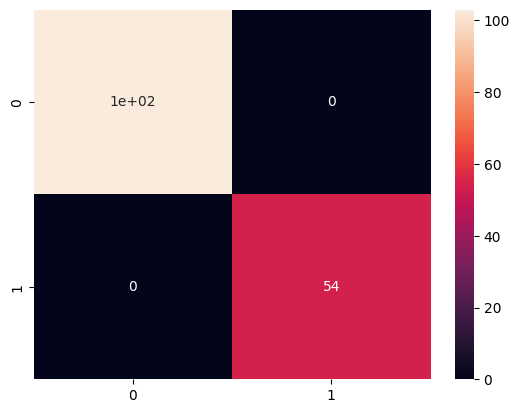

In [195]:
#making the heat map for the confusion matrix 
sns.heatmap(confusion_matrix,annot=True)
plt.show()

In [196]:
#save the model 
pickle.dump(model,open('D:\\DATA_SCIENCE_PROJECTS\\Ml_Algorathims\\Saved_Ml_Models\\logistic_regression_model.pkl','wb'))
